## Assignment 8

### Data preparation
- Extract data from the zip file "ex8.zip"
- Locate the Austin.aprx file and open it with ArcGIS Pro. Check the maps and databases in the project.
- Close the project without saving

### Manipulate the project in VS Code

#### Open the project and print some information (10 pnts)
- In Visual Studio Code, open the ex8 folder as a workspace
- Create a new notebook in it, and name it as "ex8.ipynb"
- In the frist block, run the following code to get information about the Austin.aprx project file
- Remember to modify the path name of the project file to make it work

In [1]:
import arcpy
import os
pathname = r"D:\Courses_at_LSU\Fall2025\GEOG4057G_GIS_Programming\HW\HW8\ex8"
aprx = arcpy.mp.ArcGISProject(os.path.join(pathname,"Austin.aprx"))
print(aprx.defaultGeodatabase)

D:\Courses_at_LSU\Fall2025\GEOG4057G_GIS_Programming\HW\HW8\ex8\Austin_Data.gdb


#### Save a copy of the project (10 pnts)
- Use the project.saveAsCopy() function to save the project file to a copy of it
- In the notebook, add a new code block and run the following code
- Make sure you modify the pathname to fit your current working environment

In [2]:
aprx.saveACopy(os.path.join(pathname,'Austin_Copy.aprx'))

#### Examine the new project file (10 pnts)
- Open the new project file you created in ArcGIS Pro to check the items in the project
- **Is everything the same as the original project? (Compare the difference in the file sizes) and why?** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The copied project has the same maps and data references as the original, but the file sizes are not the same. In my case, the original one is 60 KB while the copy is 48 KB. The reason of the difference in the file sizes are that project files mainly store references to maps and layers, not the actual data. When a copy is made, ArcGIS may rewrite metadata or drop cached information, which changes the size a little. So even though the sizes differ, the content and functionality of the project remain the same.
- Leave the ArcGIS Pro and the project opened because the following instructions will be based on this project
- Add the notebook you created for this exercise into the project - notebooks
- Open the added notebook

### Work with maps

#### Use the following code to print a list of maps in the project (10 pnts)

In [1]:
aprx = arcpy.mp.ArcGISProject('CURRENT')
maps = aprx.listMaps()
for m in maps:
    print(m.name)
    print(m.mapUnits)
del aprx

Downtown
Foot_US
Region
Foot_US


- **What does del do in the last line? Was the project file deleted?** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The del aprx command does not delete the actual project file. Instead, it removes the Python variable that references the project from memory, which releases the lock ArcPy places on the .aprx file while the script is running. This ensures the project can be updated again in ArcGIS Pro. The file itself remains safe and unchanged, only the temporary Python reference is cleared.

#### Use the following code to change the name of a map (10 pnts)

In [2]:
aprx = arcpy.mp.ArcGISProject('CURRENT')
m = aprx.listMaps("Region")[0]
m.name = "County"
del aprx

- In the project catelog pane, check the maps to confirm the name is changed. ***Note: I checked and confirm the name is changed.*** <br>
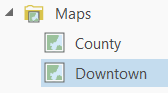

#### Use the following code to list the layers in a map (10 pnts)

In [3]:
aprx = arcpy.mp.ArcGISProject('CURRENT')
maps = aprx.listMaps()
for m in maps:
    print("Map: " + m.name)
    lyrs = m.listLayers()
    for lyr in lyrs:
        print(lyr.name)
del aprx

Map: Downtown
trees
parks
base
Topographic
Map: County
facilities
hospitals
parks
Topographic


- Additionally, use the following code to print if a layer is a basemap or a feature layer

In [4]:
aprx = arcpy.mp.ArcGISProject('CURRENT')
m = aprx.listMaps("Downtown")[0]
lyrs = m.listLayers()
for lyr in lyrs:
    if lyr.isBasemapLayer:
        print(lyr.name + " is a basemap layer")
    if lyr.isFeatureLayer:
        print(lyr.name + " is a feature layer")
del aprx

trees is a feature layer
parks is a feature layer
base is a feature layer
Topographic is a basemap layer


#### Change the basemap (5 pnts)

- Use the following code to change the basemap of Downtown

In [5]:
aprx = arcpy.mp.ArcGISProject('CURRENT')
m = aprx.listMaps("Downtown")[0]
m.addBasemap("Light Gray Canvas")

- After running the code, open the map and confirm the basemap is changed. ***Note: confirmed*** <br>
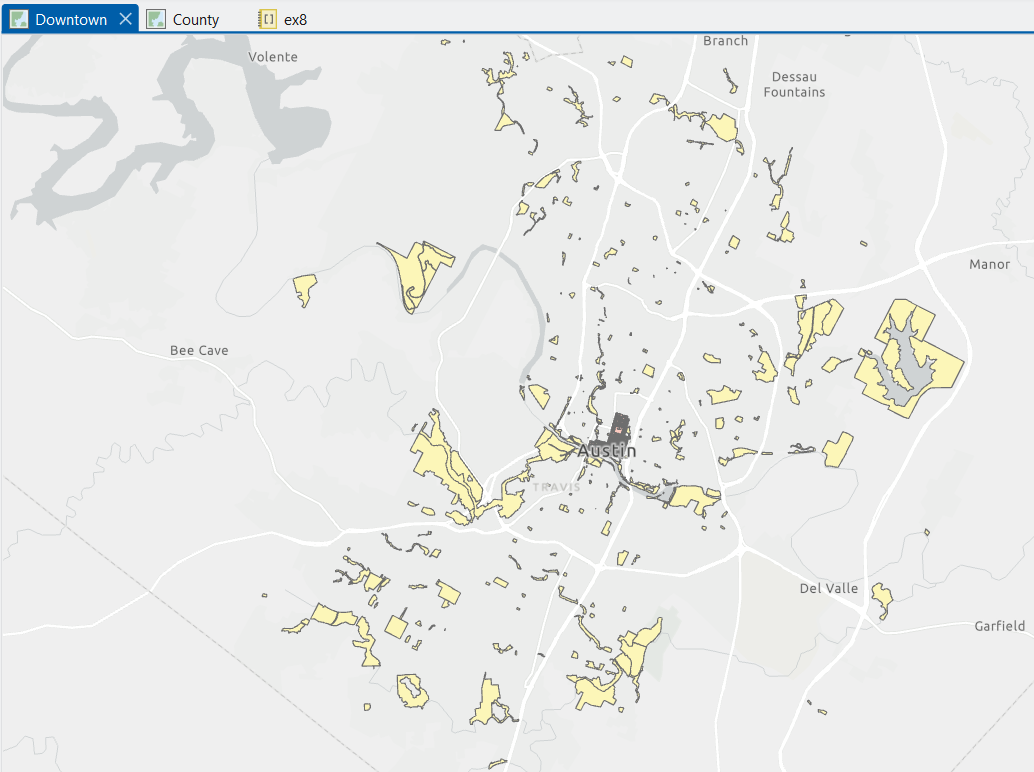

### Work with layers

#### Modify layer symbology (5 pnts)

- Run the following code in a block to change the symbology of layers

In [16]:
aprx = arcpy.mp.ArcGISProject("CURRENT")
m = aprx.listMaps("Downtown")[0]
lyr = m.listLayers("parks")[0]
sym = lyr.symbology
green = {"RGB": [100, 175, 0, 100]}
if lyr.isFeatureLayer and hasattr(sym, "renderer"):
    sym.renderer.symbol.color = green
    lyr.symbology = sym

- **What type is the 'green' variable? What do the numbers in the list mean? If you want to show a brown color, what numbers you would fill it with? Change it in the block and confirm the color is changed to brown.** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The type of 'green' variable is dictionary. The numbers to change the color from green to brown should be [150, 75, 0, 100] (I googled for the numbers). The change of code is below and I checked the map the color change to brown correctly.

In [19]:
aprx = arcpy.mp.ArcGISProject("CURRENT")
m = aprx.listMaps("Downtown")[0]
lyr = m.listLayers("parks")[0]
sym = lyr.symbology
brown = {"RGB": [150, 75, 0, 100]} # Change the color from green to brown (I googled for the numbers)
if lyr.isFeatureLayer and hasattr(sym, "renderer"):
    sym.renderer.symbol.color = brown
    lyr.symbology = sym

### Work with a layout

#### Add a layout to the project ((5 pnts))

- Run the following code to create a layout and insert the map "Downtown" in the layout

In [22]:
m = aprx.listMaps("Downtown")[0]

lyt = aprx.createLayout( 11,8.5, 'INCH', 'New Layout with Rectangles')

def MakeRec_LL(llx, lly, w, h):
    xyRecList = [[llx, lly], [llx, lly+h], [llx+w,lly+h], [llx+w,lly], [llx,lly]]
    array = arcpy.Array([arcpy.Point(*coords) for coords in xyRecList])
    rec = arcpy.Polygon(array)
    return rec

mf = lyt.createMapFrame(MakeRec_LL(0.5,0.5,10,7.5), m, "New Map Frame")

- **What is the size of the layout in inches?** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The layout size is 11 x 8.5 inches.
- **What is the size of the map frame?** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The map frame size is 10 x 7.5 inches.
- **Comparing the layout and map frames you created manually, what are the advantages of creating it in Python?** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Creating layouts and map frames in Python is advantageous because it allows automation (we can quickly generate layouts without manually clicking through menus), ensures consistent sizing and positioning (reproducible), and saves time when working with many maps or repeating tasks. Python also lets us combine layout creation with other GIS tasks (like updating layers or exporting maps).

#### Add layout elements (5 pnts)

- Run the following code to create a north arrow and a scale bar

In [23]:
#Create a north arrow
naStyle = aprx.listStyleItems('ArcGIS 2D', 'North_Arrow', 'Compass North 1')[0]
na = lyt.createMapSurroundElement(arcpy.Point(9.5,7.5), 'North_Arrow', mf,
                                      naStyle, "Compass North Arrow")
na.elementWidth = 0.5  

#Create a scale bar
sbName = 'Double Alternating Scale Bar 1 Metric'
sbStyle = aprx.listStyleItems('ArcGIS 2D', 'Scale_bar', sbName)[0]
sbEnv = MakeRec_LL(5.5, 0.1, 4, 0.5)
sb = lyt.createMapSurroundElement(sbEnv, 'Scale_bar', mf, sbStyle, 'New Scale Bar')

- Run the follow code to create a legend

In [24]:
legSi = aprx.listStyleItems('ArcGIS 2D', 'LEGEND', 'Legend 3' )[0]
leg = lyt.createMapSurroundElement(arcpy.Point(1,7), 'LEGEND', mf, legSi, 'New Legend Element')
leg.elementWidth = 3
leg.elementHeight = 3
leg.fittingStrategy = 'AdjustFontSize'
leg.columnCount = 1
leg.title = 'Downtown'

#### Export the layout to a pdf (10 pnts)

- Run the following code to export the layout to a pdf file

In [25]:
lyt.exportToPDF(os.path.join(pathname, 'downtown.pdf'))

'D:\\Courses_at_LSU\\Fall2025\\GEOG4057G_GIS_Programming\\HW\\HW8\\ex8\\downtown.pdf'